<a href="https://colab.research.google.com/github/Rpmalukani22/Personalized-Medicine-Redefining-Cancer-Treatment/blob/master/Personalized_Medicine_Redefining_Cancer_Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
#verification
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

In [5]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 5.3MB 25.5MB/s 
     |████████████████████████████████| 112kB 61.0MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 112kB 61.2MB/s 


In [50]:
!kaggle competitions download -c msk-redefining-cancer-treatment

training_variants.zip: Skipping, found more recently modified local copy (use --force to force download)
test_variants.zip: Skipping, found more recently modified local copy (use --force to force download)
training_text.zip: Skipping, found more recently modified local copy (use --force to force download)
test_text.zip: Skipping, found more recently modified local copy (use --force to force download)
stage2_sample_submission.csv.7z: Skipping, found more recently modified local copy (use --force to force download)
stage2_test_variants.csv.7z: Skipping, found more recently modified local copy (use --force to force download)
stage2_test_text.csv.7z: Skipping, found more recently modified local copy (use --force to force download)
stage1_solution_filtered.csv.7z: Skipping, found more recently modified local copy (use --force to force download)
stage_2_private_solution.csv.7z: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!ls -l

total 172972
-rw-r--r-- 1 root root        67 Oct 29 16:27 kaggle.json
drwxr-xr-x 1 root root      4096 Oct 25 16:58 sample_data
-rw-r--r-- 1 root root      1307 Oct 29 16:28 stage1_solution_filtered.csv.7z
-rw-r--r-- 1 root root       592 Oct 29 16:28 stage_2_private_solution.csv.7z
-rw-r--r-- 1 root root       765 Oct 29 16:28 stage2_sample_submission.csv.7z
-rw-r--r-- 1 root root   9308786 Oct 29 16:28 stage2_test_text.csv.7z
-rw-r--r-- 1 root root      7422 Oct 29 16:28 stage2_test_variants.csv.7z
-rw-r--r-- 1 root root 103787620 Oct 29 16:28 test_text.zip
-rw-r--r-- 1 root root     48614 Oct 29 16:28 test_variants.zip
-rw-r--r-- 1 root root  63917183 Oct 29 16:28 training_text.zip
-rw-r--r-- 1 root root     24831 Oct 29 16:28 training_variants.zip


In [51]:
!mkdir -p training
!unzip training_variants.zip -d ./training
!ls -l ./training

Archive:  training_variants.zip
replace ./training/training_variants? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./training/training_variants  
total 207224
-rw-r--r-- 1 root root 212125752 Jun 20  2018 training_text
-rw-rw-r-- 1 root root     66688 Jun 22  2017 training_variants


In [0]:
import pandas as pd

In [0]:
data_variants=pd.read_csv('training/training_variants')

In [54]:
data_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [55]:
!unzip training_text.zip -d ./training
!ls -l ./training

Archive:  training_text.zip
replace ./training/training_text? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./training/training_text  
total 207224
-rw-r--r-- 1 root root 212125752 Jun 20  2018 training_text
-rw-rw-r-- 1 root root     66688 Jun 22  2017 training_variants


In [56]:
data_text=pd.read_csv('training/training_text',sep='''\|\|''',names=['ID','TEXT'],skiprows=1,engine='python')
data_text.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [57]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

In [0]:
import re
def text_preprocessing(text,row,col):
  if type(text) is not int:
    text=re.sub('[^A-z0-9]',' ',str(text)) #removing special characters
    text=re.sub('\s+',' ',str(text)) #replace multi character space into single character space
    text=str(text).lower()#convert into lower case
    string=""
    for i in text.split():
      if i not in stopwords:
        string+=i+" "
    data_text[col][row]=string

In [0]:
for ind,txt in data_text.iterrows():
  print(txt['TEXT'])
  if type(txt['TEXT'])is str:
    text_preprocessing(txt['TEXT'],ind,'TEXT')

In [73]:
data_text.iloc[0]['TEXT'][:100]# Print and verify

'cyclin dependent kinases cdks regulate variety fundamental cellular processes cdk10 stands one last '

In [104]:
result = pd.merge(data_variants,data_text,on='ID',how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [105]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
TEXT         3316 non-null object
dtypes: int64(2), object(3)
memory usage: 155.7+ KB


In [106]:
result[result.isnull().any(axis=1)] #getting rows for which text is null

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [0]:
result.loc[result['TEXT'].isnull(),'TEXT']=result['Gene']+' '+result['Variation']

In [108]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
TEXT         3321 non-null object
dtypes: int64(2), object(3)
memory usage: 315.7+ KB


In [109]:
result[result.isnull().any(axis=1)] #getting rows for which text is null

,ID,Gene,Variation,Class,TEXT


In [112]:
result['TEXT'][1109] #verification 

'FANCA S1088F'

In [116]:
Y=result['Class']
result.Gene = result.Gene.str.replace('\s+','_')
result.Variation=result.Variation.str.replace('\s+','_')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(result,Y,stratify=Y,test_size=0.2)#80 20 split of whole data

In [0]:
X_train,X_cv,Y_train,Y_cv=train_test_split(X_train,Y_train,stratify=Y_train,test_size=0.2)#80 20 split of training data

In [0]:
train_data_distribution=X_train['Class'].value_counts().sort_index()

In [0]:
test_data_distribution=X_test['Class'].value_counts().sort_index()

In [0]:
cv_data_distribution=X_cv['Class'].value_counts().sort_index()

In [0]:
import matplotlib.pyplot as plt
def plot_dist(set_name,data_distribution):
  my_colors='rgbkymc'
  data_distribution.plot(kind='bar',color=list(my_colors))
  plt.xlabel('Class')
  plt.ylabel('Frequency')
  plt.title('Class based frequency distribution of datapoints in %s data'%set_name)
  plt.grid()
  plt.show()

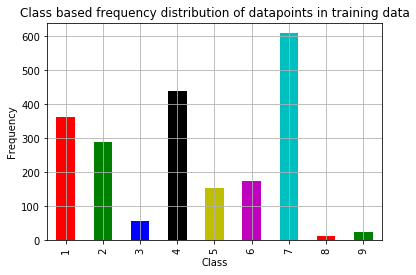

In [161]:
plot_dist('training',train_data_distribution)

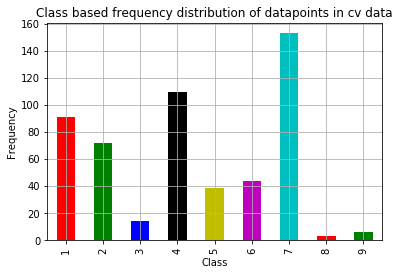

In [162]:
plot_dist('cv',cv_data_distribution)

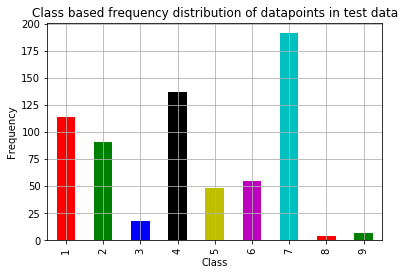

In [164]:
plot_dist('test',test_data_distribution)

In [0]:
def get_percentage_idea(data_distribution):
  args=np.argsort(-data_distribution.values) #desc order of freq
  n=sum(data_distribution.values)
  for i in range(len(args)):
    print('Class',args[i]+1,'% of data points',data_distribution.values[args[i]]*100/n)

In [205]:
get_percentage_idea(train_data_distribution)

Class 7 % of data points 28.672316384180792
Class 4 % of data points 20.66854990583804
Class 1 % of data points 17.09039548022599
Class 2 % of data points 13.606403013182675
Class 6 % of data points 8.286252354048964
Class 5 % of data points 7.297551789077213
Class 3 % of data points 2.6836158192090394
Class 9 % of data points 1.1299435028248588
Class 8 % of data points 0.5649717514124294


In [206]:
get_percentage_idea(cv_data_distribution)

Class 7 % of data points 28.7593984962406
Class 4 % of data points 20.67669172932331
Class 1 % of data points 17.105263157894736
Class 2 % of data points 13.533834586466165
Class 6 % of data points 8.270676691729323
Class 5 % of data points 7.330827067669173
Class 3 % of data points 2.6315789473684212
Class 9 % of data points 1.1278195488721805
Class 8 % of data points 0.5639097744360902


In [207]:
get_percentage_idea(test_data_distribution)

Class 7 % of data points 28.721804511278197
Class 4 % of data points 20.601503759398497
Class 1 % of data points 17.142857142857142
Class 2 % of data points 13.68421052631579
Class 6 % of data points 8.270676691729323
Class 5 % of data points 7.2180451127819545
Class 3 % of data points 2.706766917293233
Class 9 % of data points 1.0526315789473684
Class 8 % of data points 0.6015037593984962
